# BIG MART SALES PREDICYTION

## Fuctions

In [1]:
#FUCTIONS and Libraries
import pandas as pd 
import warnings 
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math 
from statistics import median 
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, make_scorer 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_val_score 
from tabulate import tabulate 
from sklearn.utils.multiclass import type_of_target
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.preprocessing import PolynomialFeatures 
import warnings 
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle 
import xgboost as xgb  
from catboost import CatBoostClassifier 
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import to_categorical 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import GradientBoostingRegressor

In this notebook we are predicting sales in the Bigmart.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# df = pd.read_csv("/content/drive/MyDrive/train_v9rqX0R.csv")
df = pd.read_csv("train_v9rqX0R.csv")
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
print(df.shape)

(8523, 12)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Item_Weight'] = df.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [10]:
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))

In [11]:
df.head(100)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
95,FDU04,12.857645,Low Fat,0.009715,Frozen Foods,120.0414,OUT019,1985,Small,Tier 1,Grocery Store,487.3656
96,FDF41,12.150000,Low Fat,0.131384,Frozen Foods,246.0460,OUT049,1999,Medium,Tier 1,Supermarket Type1,1231.7300
97,FDB56,8.750000,Regular,0.074613,Fruits and Vegetables,187.4556,OUT035,2004,Small,Tier 2,Supermarket Type1,3755.1120
98,NCP18,12.857645,Low Fat,0.028460,Household,149.9708,OUT027,1985,Medium,Tier 3,Supermarket Type3,4363.6532


In [12]:
print(df.shape)

(8523, 12)


In [13]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns


for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Item_Identifier: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size: ['Medium' 'Small' 'High']
Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


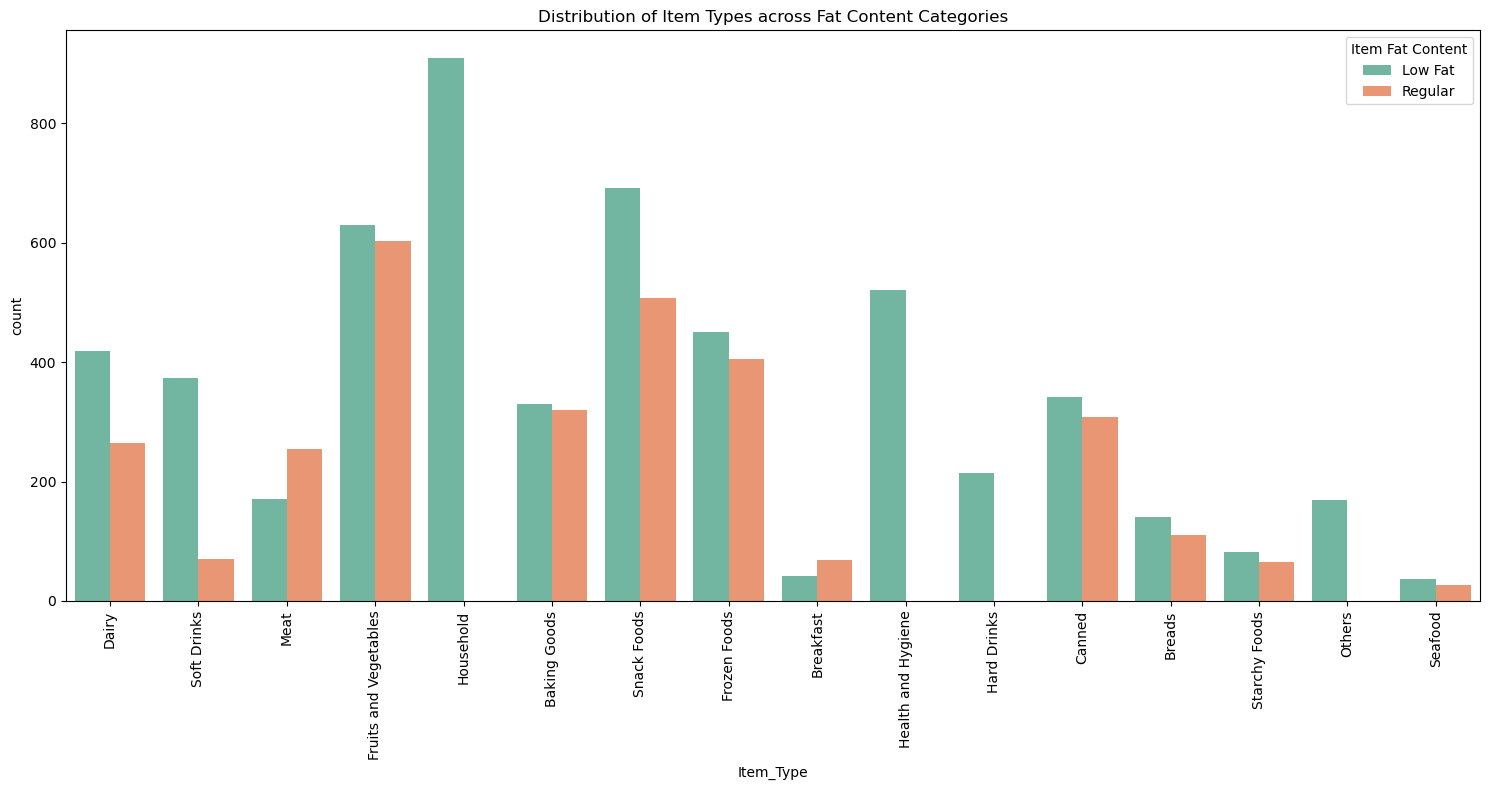

In [15]:

fat_content_normalized = {
    'Low Fat': 'Low Fat',
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'Regular': 'Regular',
    'reg': 'Regular'
}

df1 = df

df1['Item_Fat_Content'] = df1['Item_Fat_Content'].map(fat_content_normalized)

# Create a count plot
plt.figure(figsize=(15, 8))  # Adjusted figure size for better display
sns.countplot(data=df1, x='Item_Type', hue='Item_Fat_Content', palette='Set2')
plt.title('Distribution of Item Types across Fat Content Categories')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()


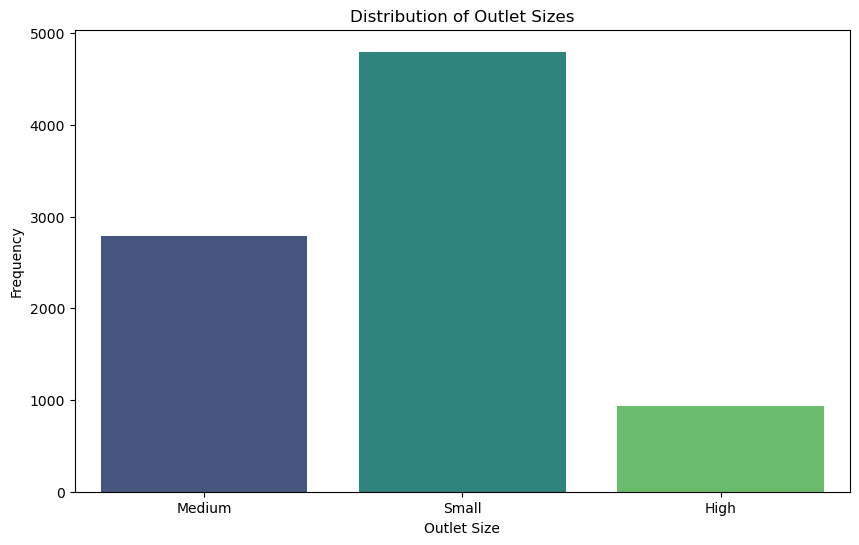

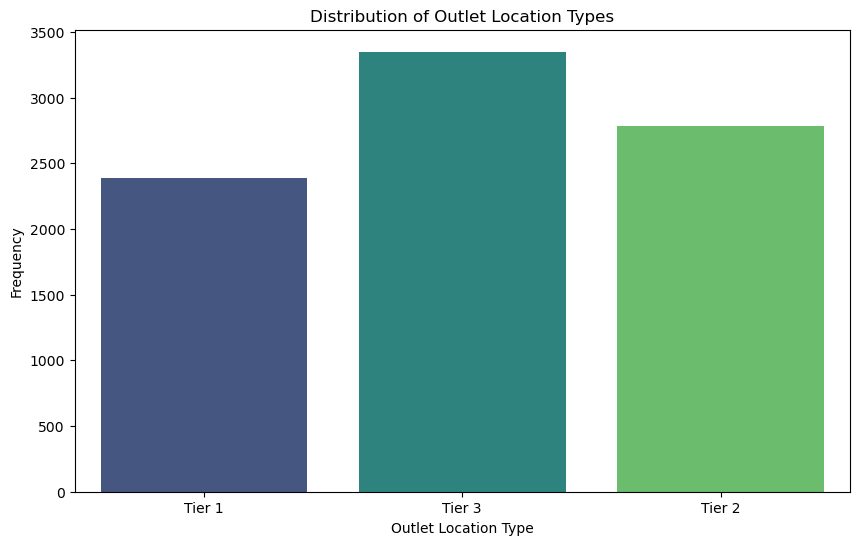

In [16]:
df2 = df

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Outlet_Size', palette='viridis')
plt.title('Distribution of Outlet Sizes')
plt.ylabel('Frequency')
plt.xlabel('Outlet Size')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='Outlet_Location_Type', palette='viridis')
plt.title('Distribution of Outlet Location Types')
plt.ylabel('Frequency')
plt.xlabel('Outlet Location Type')
plt.show()


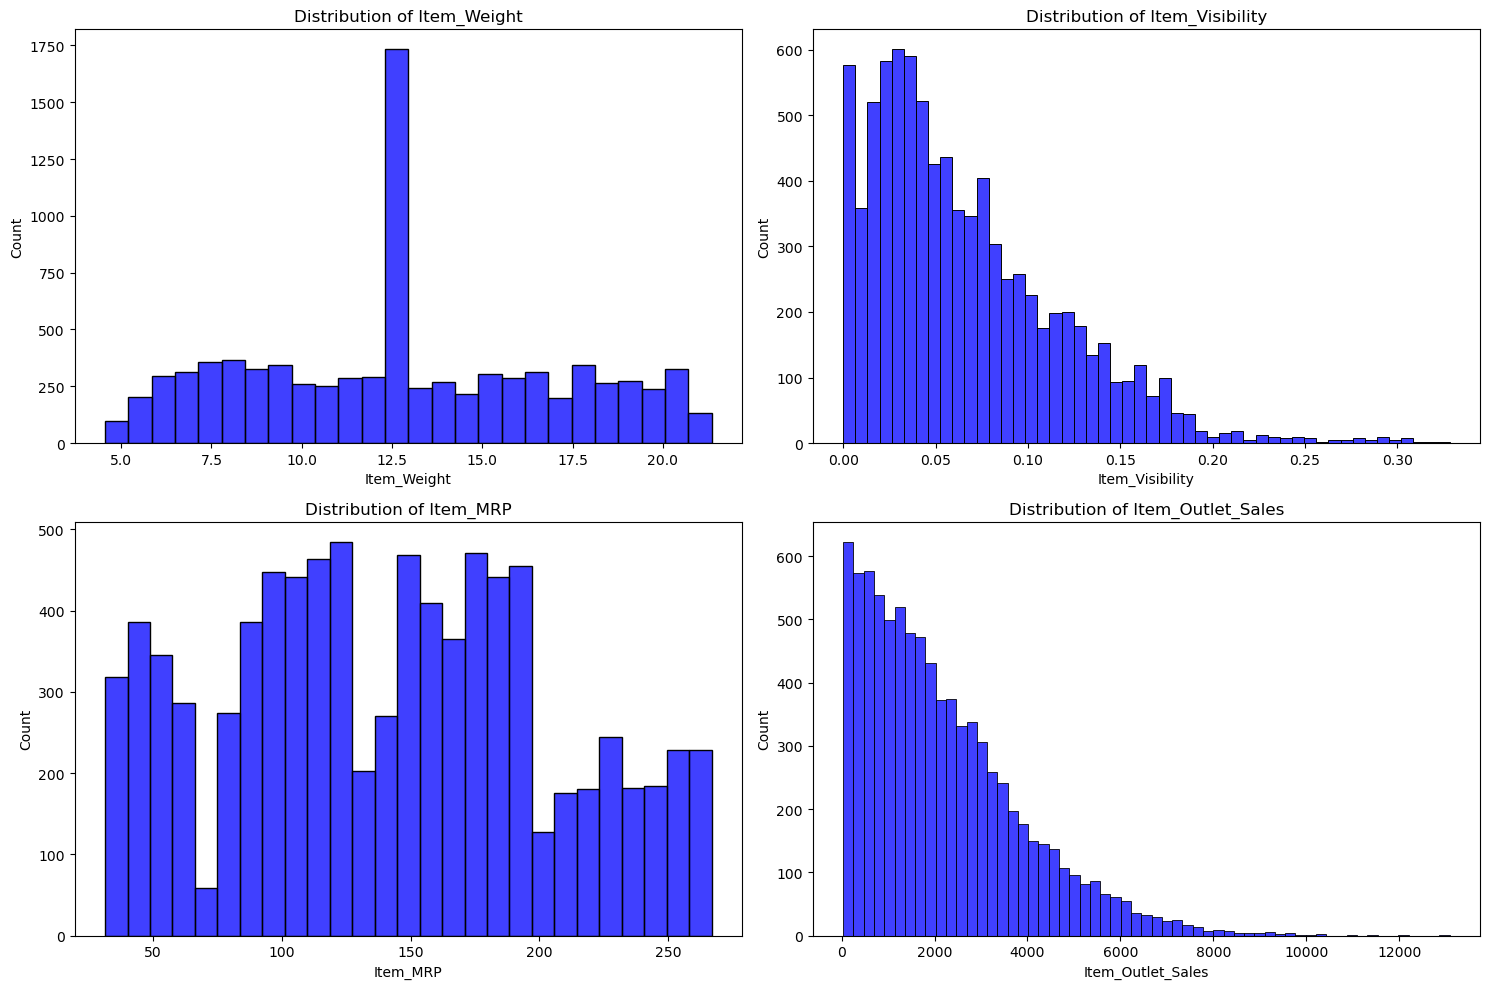

In [17]:

# List of numerical attributes
numerical_attributes = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_attributes):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[var].dropna(), kde=False, color='blue')
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()


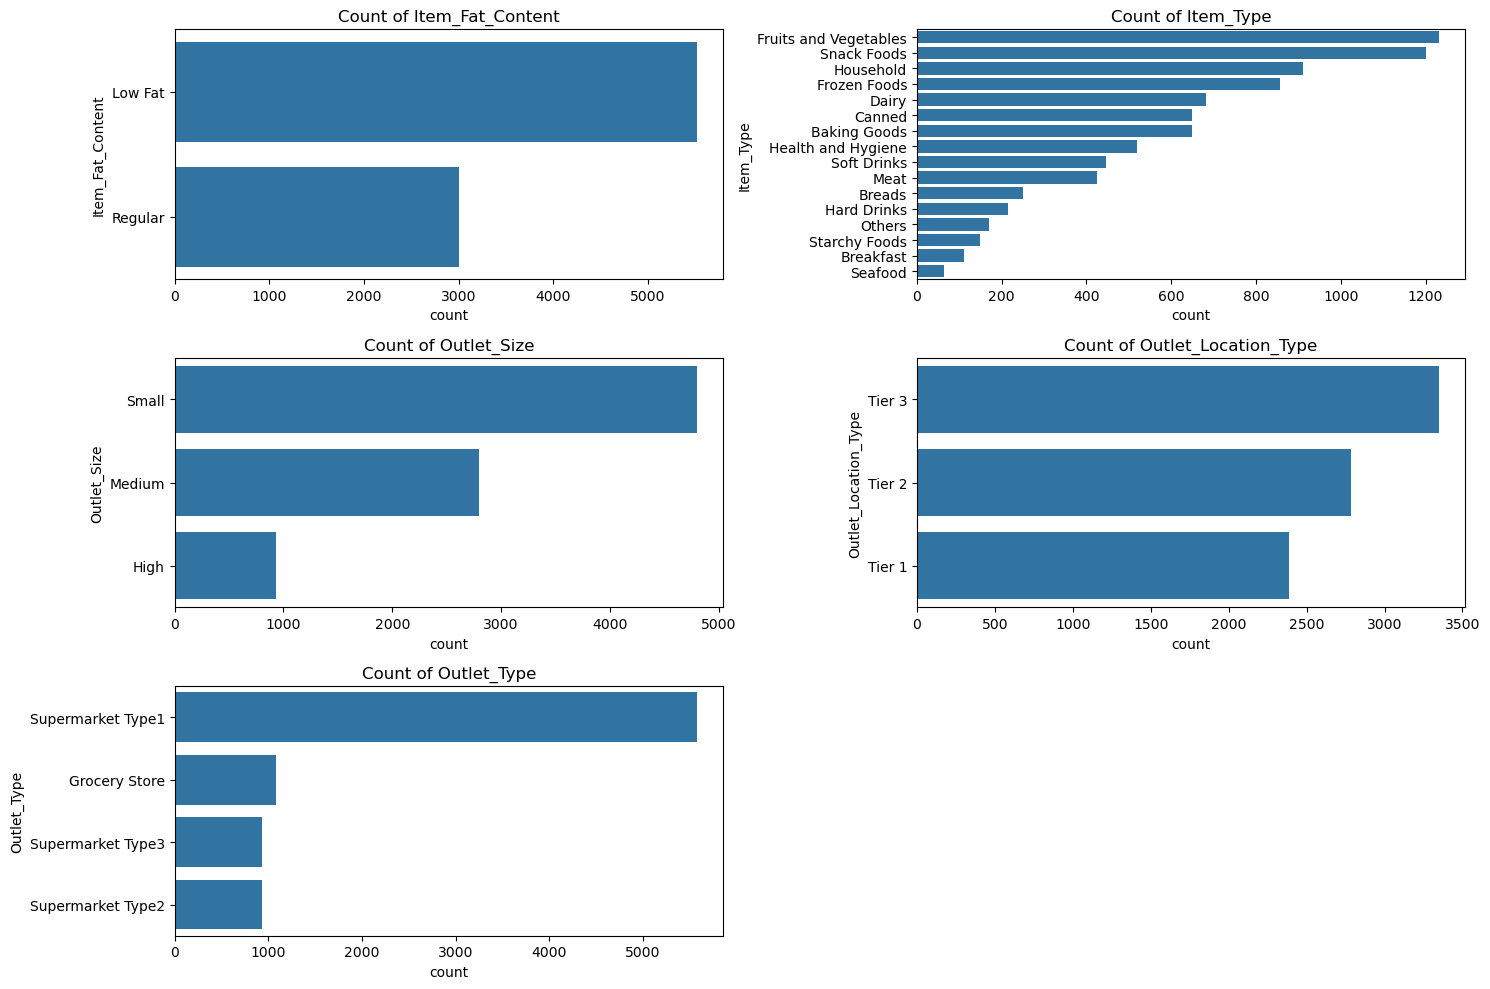

In [18]:
# List of categorical attributes
categorical_attributes = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_attributes):
    plt.subplot(3, 2, i+1)
    sns.countplot(y=df[var], order = df[var].value_counts().index)
    plt.title(f'Count of {var}')
    plt.tight_layout()
plt.show()


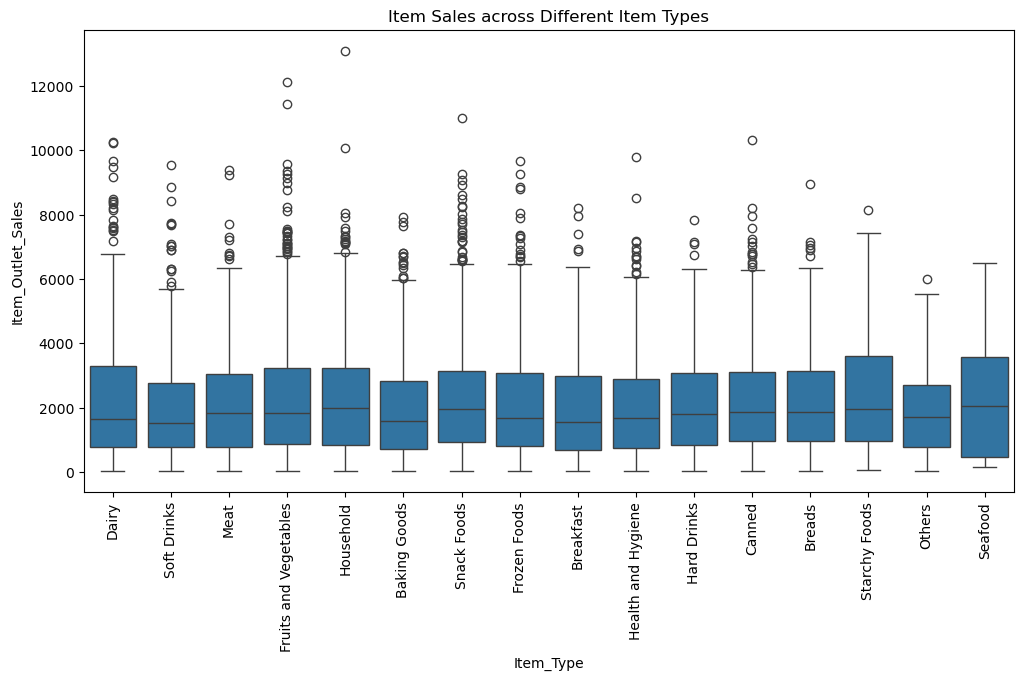

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation=90)
plt.title('Item Sales across Different Item Types')
plt.show()


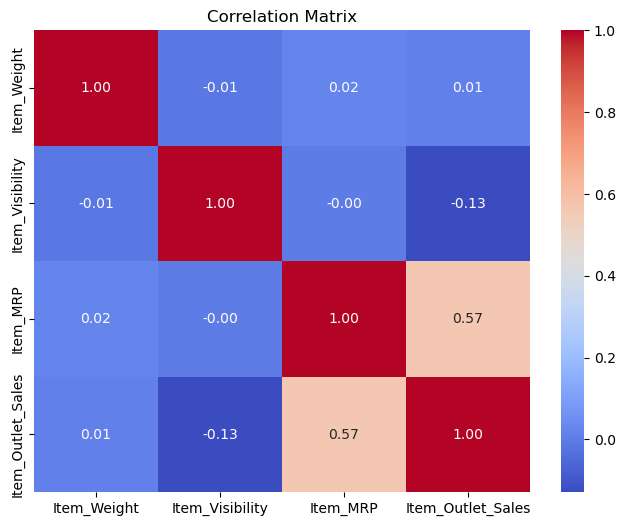

In [20]:
correlation = df[numerical_attributes].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


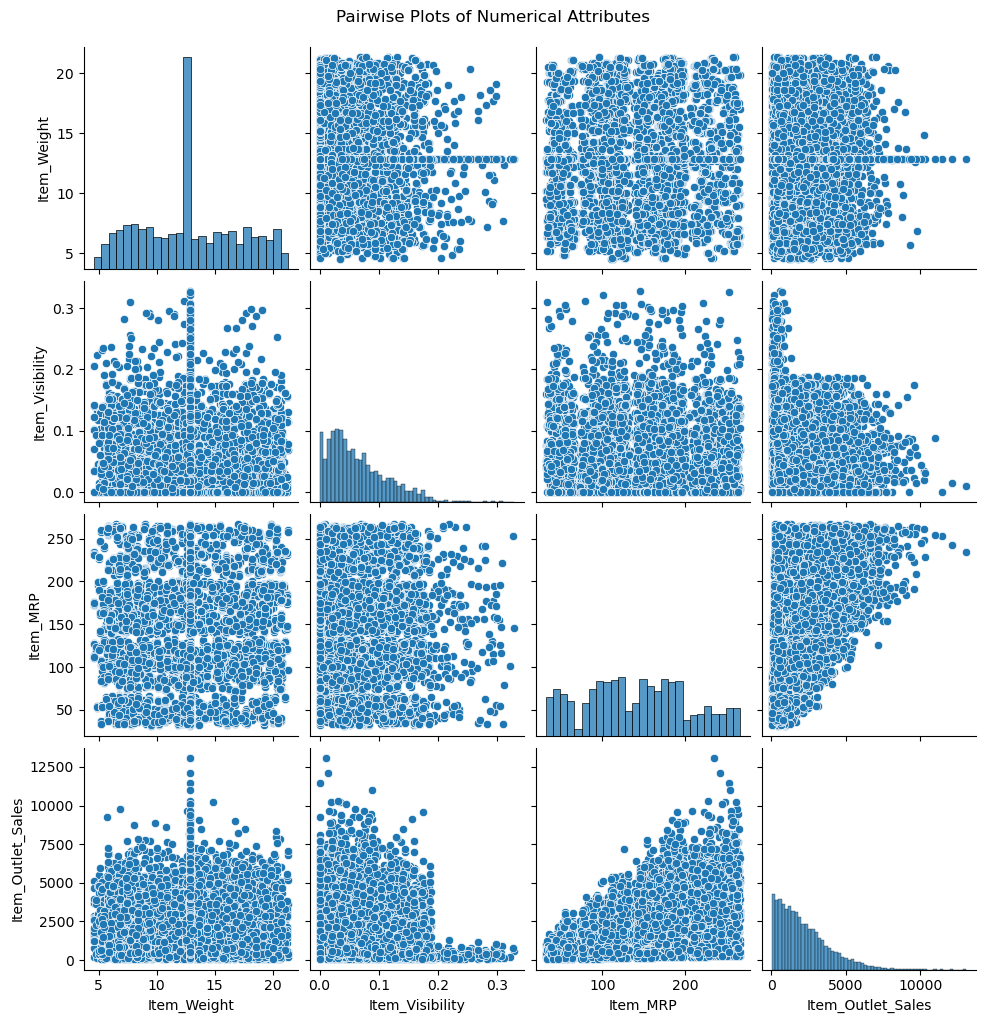

In [21]:
sns.pairplot(df[numerical_attributes])
plt.suptitle('Pairwise Plots of Numerical Attributes', y=1.02)
plt.show()


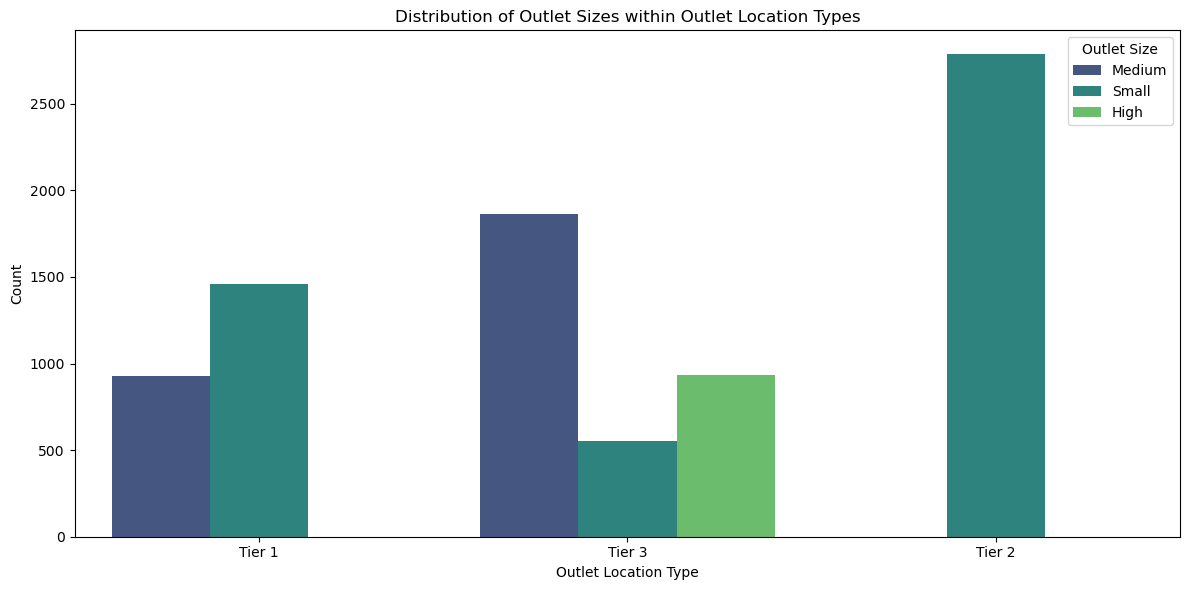

In [22]:
df3 = df

plt.figure(figsize=(12, 6))
sns.countplot(data=df3, x='Outlet_Location_Type', hue='Outlet_Size', palette='viridis')
plt.title('Distribution of Outlet Sizes within Outlet Location Types')
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.legend(title='Outlet Size')
plt.tight_layout()
plt.show()


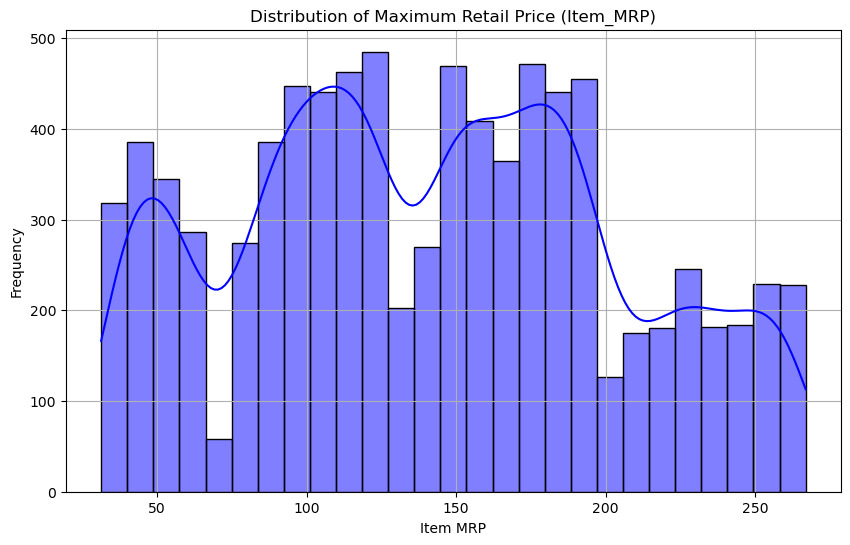

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_MRP'], kde=True, color='blue')
plt.title('Distribution of Maximum Retail Price (Item_MRP)')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

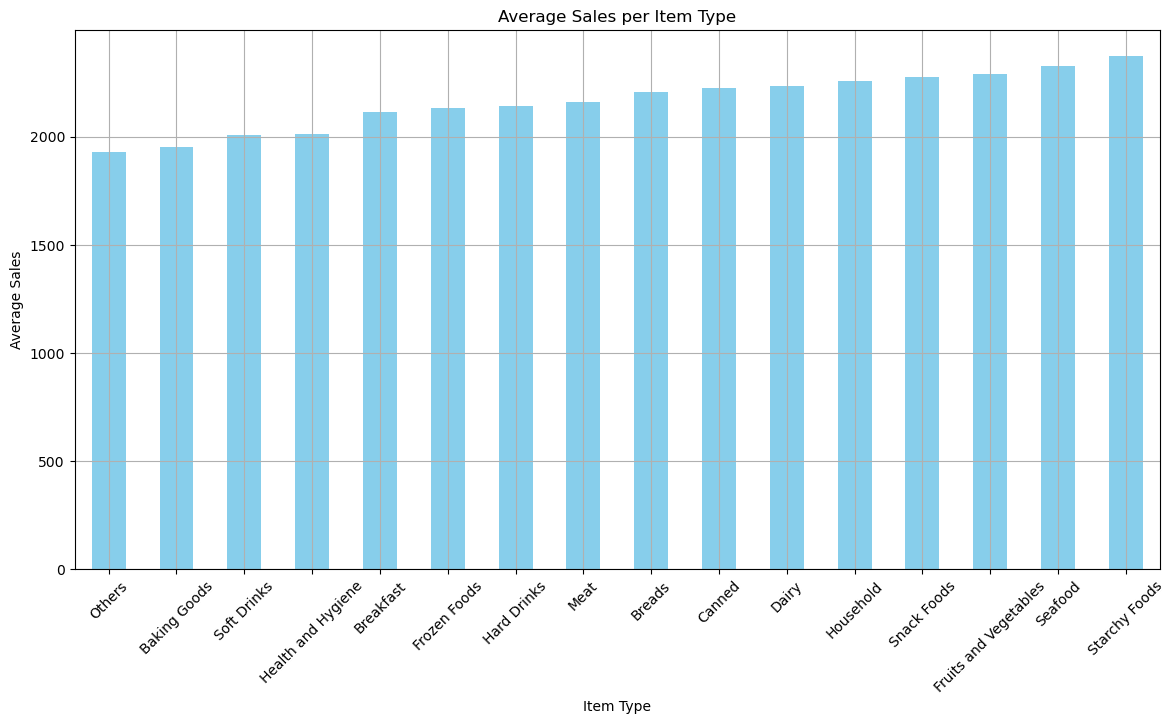

In [24]:
plt.figure(figsize=(14, 7))
avg_sales_per_item_type = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values()
avg_sales_per_item_type.plot(kind='bar', color='skyblue')
plt.title('Average Sales per Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

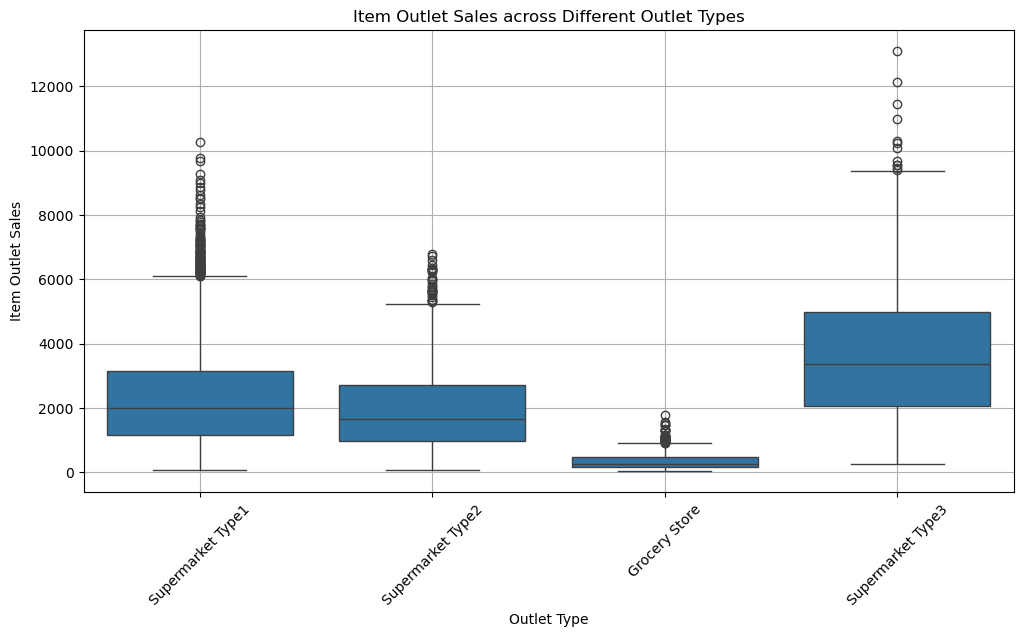

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title('Item Outlet Sales across Different Outlet Types')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

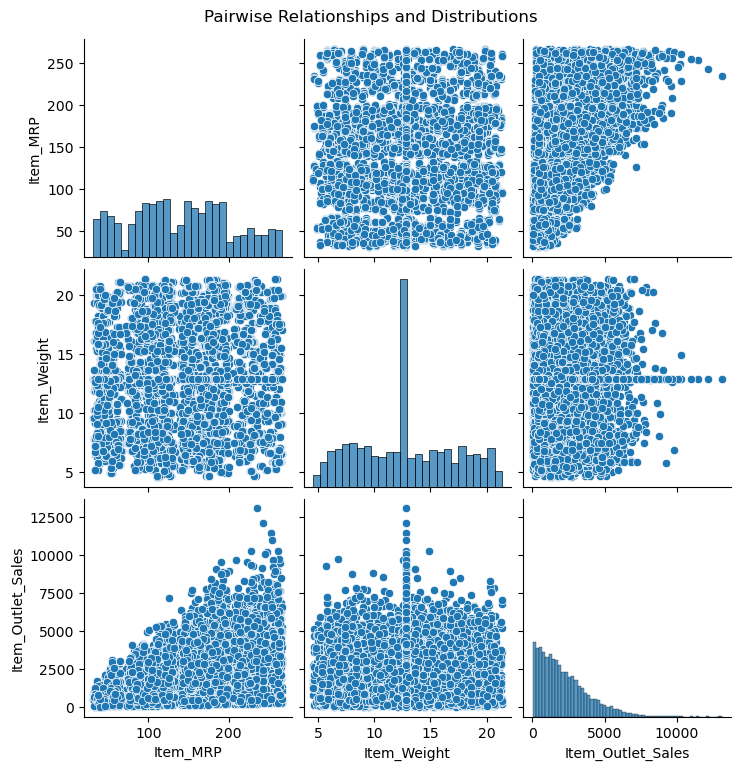

In [26]:
sns.pairplot(df[['Item_MRP', 'Item_Weight', 'Item_Outlet_Sales']])
plt.suptitle('Pairwise Relationships and Distributions', y=1.02)
plt.show()

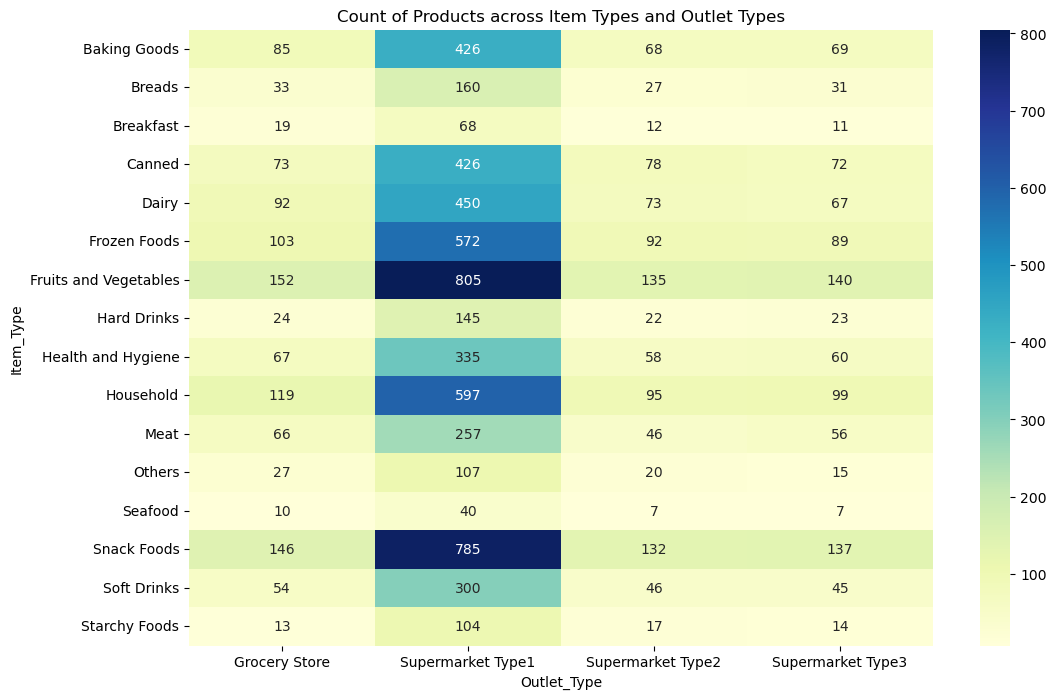

In [27]:
cross_tab = pd.crosstab(df['Item_Type'], df['Outlet_Type'])
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Count of Products across Item Types and Outlet Types')
plt.show()

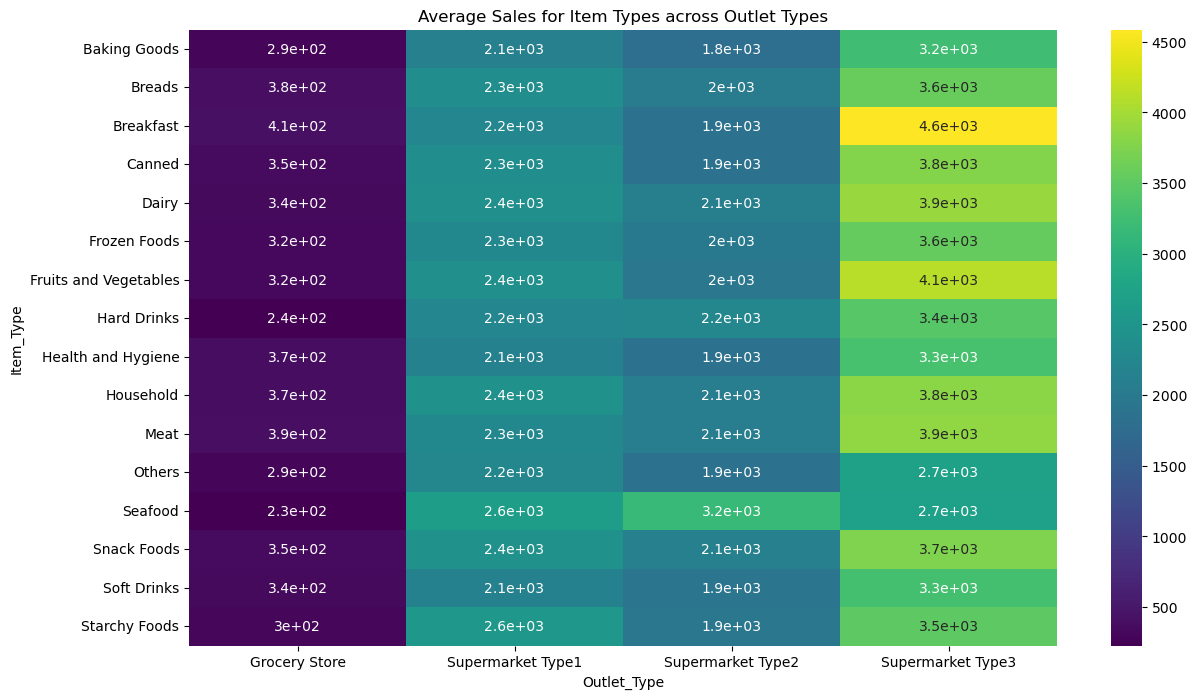

In [28]:
pivot_table_sales = df.pivot_table(values='Item_Outlet_Sales', index='Item_Type', columns='Outlet_Type', aggfunc='mean')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table_sales, annot=True, cmap='viridis')
plt.title('Average Sales for Item Types across Outlet Types')
plt.show()

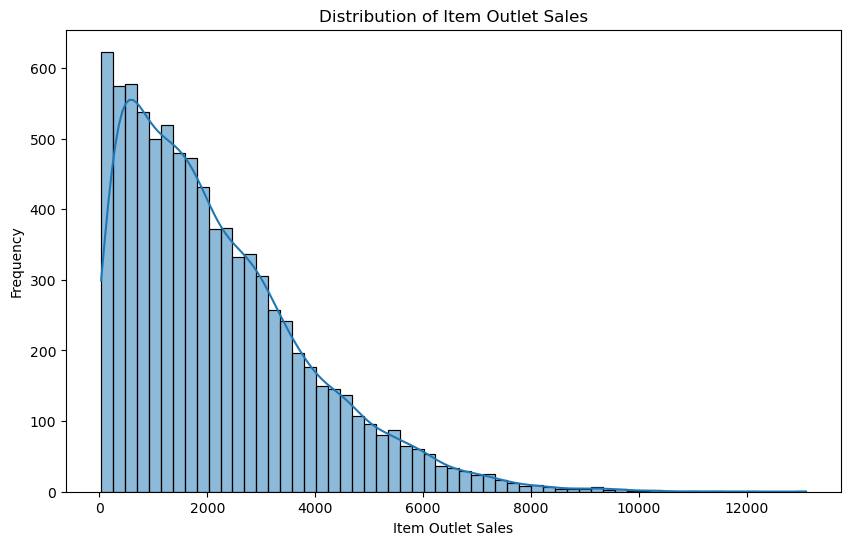

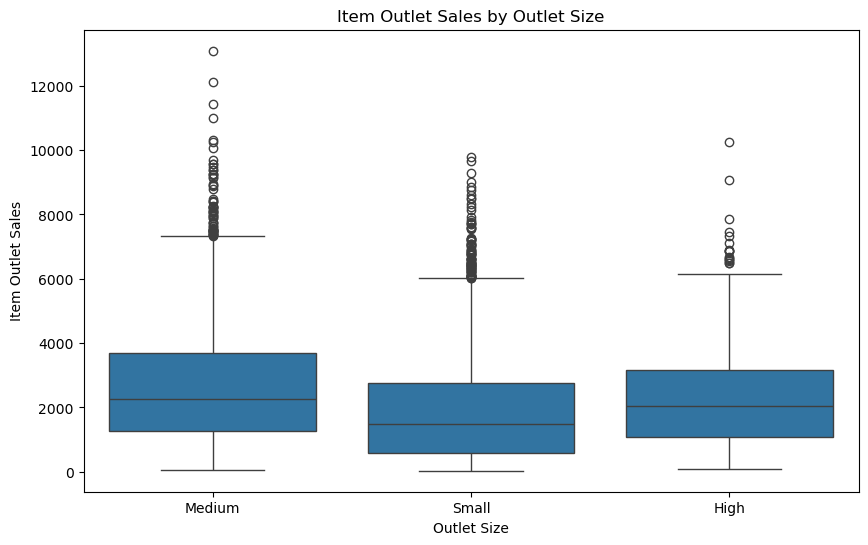

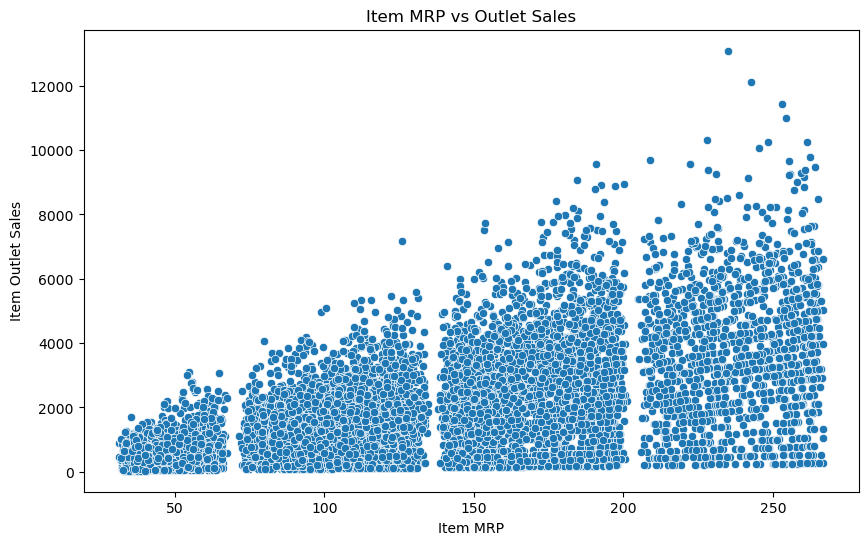

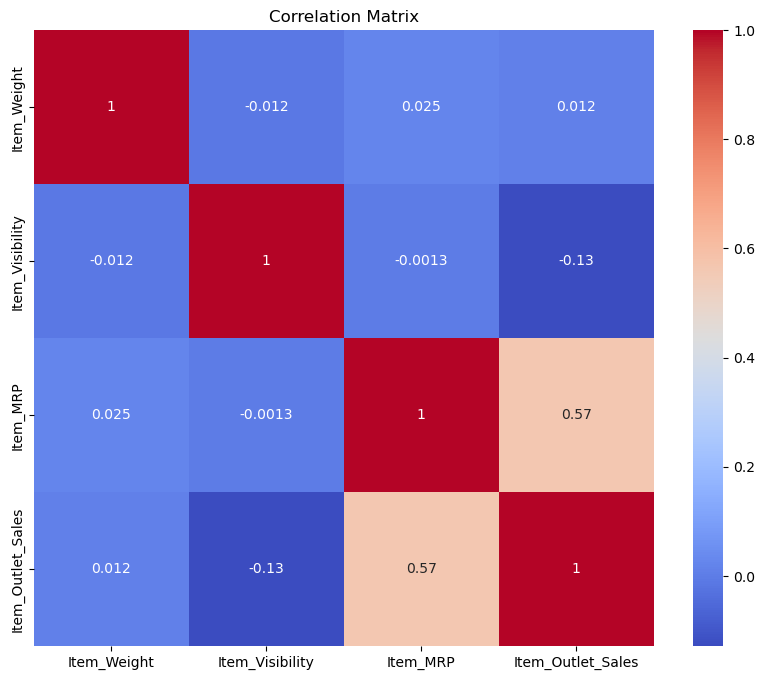

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Histogram of Item Outlet Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_Outlet_Sales'], kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

# Box Plot for Outlet Sales by Outlet Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
plt.title('Item Outlet Sales by Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.show()

# Scatter Plot of Item MRP vs Outlet Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df)
plt.title('Item MRP vs Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_attributes].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## _Machine Learning Model_

#### PREP

In [30]:
Table = [] 
Table_All = [] 
Table_All_c = []
Model = []
Score = []
best_model_score = 0 
Accuracy = []
score_g = make_scorer(f1_score, average='weighted')
def save_model(model):
    model_name = model.__class__.__name__
    filename = f'{model_name}.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)  
        
def update_best_model(current_model, current_score, best_model, best_score):
    if current_score > best_score:
        best_model = current_model
        best_score = current_score
    return best_model, best_score 

def grid(mdl, grid_search_param, X_train, y_train, X_val, y_val, score):
    warnings.filterwarnings("ignore") 
    target_type = type_of_target(y_train)
    if target_type in ['binary', 'multiclass']:
        scoring = 'f1_weighted'  # Use weighted F1 score for classification
    elif target_type == 'continuous':
        scoring = 'neg_root_mean_squared_error'  # Use negative RMSE for regression
    else:
        raise ValueError(f"Unsupported target type {target_type}")
    grid_search = GridSearchCV(mdl, grid_search_param, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_ 
    best_score = grid_search.best_score_
    best_param = grid_search.best_params_
    y_pred_valt = None
    score_val = None
    if score == True:
        if target_type in ['binary', 'multiclass']:
            y_pred_valt = grid_search.predict(X_val)
            score_val = f1_score(y_val, y_pred_valt, average='weighted')
        elif target_type == 'continuous':
            y_pred_valt = grid_search.predict(X_val)
            score_val = mean_squared_error(y_val, y_pred_valt, squared=False)  # RMSE
    else:
        score_val = 0 
        y_pred_valt = 0 
    return best_model, best_score, best_param, y_pred_valt, score_val, grid_search 

def featured_plot(best_clf, df):
    feature_importances = best_clf.feature_importances_
    feature_names = df.columns.tolist()
    sorted_indices = feature_importances.argsort()[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
    plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices], rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importances')
    plt.show()
    
def specificity_(cf):
    tn = cf[0][0]
    fn = cf[1][0]
    specificity = tn / (tn+fn)
    return specificity

def print_(data_type, cmatrix, train_accuracy, test_accuracy, recall, specificity, precision, false_positive_rate, f1, score):
    print(data_type, "Confusion Marix:\n", cmatrix)
    print(data_type, "Training accuracy:", train_accuracy)
    print(data_type, "Testing accuracy:", test_accuracy)
    print(data_type, "Recall (Sensitivity):", recall)
    print(data_type, "Specificity:", specificity) 
    print(data_type, "Precision:", precision)
    print(data_type, "False Positive Rate:", false_positive_rate)
    print(data_type, "F1 Score:", f1)
    print(data_type, "Score:", score)
    print("#########################################################") 
    return None

def test(y_pred, model, X_train, X_test, y_train, y_test, val):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, y_pred)
    cmatrix = confusion_matrix(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1,average='weighted')
    specificity = specificity_(cmatrix)
    precision = precision_score(y_test, y_pred, average='weighted')
    false_positive_rate = 1 - specificity
    f1 = f1_score(y_test, y_pred, average='weighted')
    score = test_accuracy
    if val is False:
        print_("Test Data Set", cmatrix, train_accuracy, test_accuracy, recall, specificity, precision, false_positive_rate, f1, score)
    else:
        print_("Validation Data Set", cmatrix, train_accuracy, test_accuracy, recall, specificity, precision, false_positive_rate, f1, score)
    return cmatrix, train_accuracy, test_accuracy, recall, specificity, precision, false_positive_rate, f1, score

def print__(data_type, r2_train, rmse_train):
    print(data_type, "R^2", r2_train)
    print(data_type, "RMSE", rmse_train)
    print("#########################################################") 
    return None

def test_(y_pred, model, X_train, X_test, y_train, y_test, val):
    #y_pred_train = model.predict(X_train)
    r2_train = r2_score(y_test, y_pred) 
    mse_train = mean_squared_error(y_test, y_pred)
    rmse_train = np.sqrt(mse_train)
    if val is False: 
        print__("Test Data Set", r2_train, rmse_train) 
    else: 
        print__("Validation Data Set", r2_train, rmse_train) 
    return r2_train, rmse_train 

#r2_train, rmse_train = model_L(X_train, X_test, y_train, y_test, model,  valid = None, X_val = X_val, y_val = y_val, nam = "LinearRegression")
def model_L(X_train, X_test, y_train, y_test, model, valid, X_val, y_val, nam):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_train, rmse_train = test_(y_pred, model, X_train, X_test, y_train, y_test, val = False)
    #Table.append([nam+'_Test_Data_Set', r2_train, rmse_train])
    Table_All.append([nam+'_Test_Data_Set', r2_train, rmse_train, model])
    y_val_pred = model.predict(X_val) 
    r2_train, rmse_train = test_(y_val_pred, model, X_train, X_val, y_train = X_val, y_test = y_val, val = True)
    #Table.append([nam+'_VALIDATION_Data_Set', r2_train, rmse_train])
    Table_All.append([nam+'VALIDATION_Data_Set', r2_train, rmse_train, model])
    Model.append(model)
    #Score.append(score)
    if valid == 'CV':
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    else: 
        cv_scores = 0 
    return  r2_train, rmse_train
 
def model_(X_train, X_test, y_train, y_test, model, valid, X_val, y_val, nam):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cmatrix, train_accuracy, test_accuracy, recall, specificity, precision, false_positive_rate, f1, score = test(y_pred, model, X_train, X_test, y_train, y_test, val = False)
    Table.append([nam+'_Test_Data_Set',model, score, recall, precision, f1 ])
    Table_All.append([nam+'_Test_Data_Set', score])
    y_val_pred = model.predict(X_val) 
    cmatrix, train_accuracy, test_accuracy, recall, specificity, precision, false_positive_rate, f1, score = test(y_val_pred, model, X_train, X_val, y_train, y_val, val = True)
    Table.append([nam+'_VALIDATION_Data_Set',model, score, recall, precision, f1 ])
    Table_All.append([nam+'_VALIDATION_Data_Set', score])
    Model.append(model)
    Score.append(score)
    if valid == 'CV':
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    else: 
        cv_scores = 0 
    return  cv_scores, score

## Model Prep

## Column Handle

In [31]:
df_ = df #This DF is editorial format

- Some, Categorial data in Column were has repeated values which gives same sense but in different annotation.

In [32]:
#handle Item_Fat_Content column categories with replacement
df_['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

In [33]:
df_['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

### Feature Engineering

- The dataset has lot of categorial colums for the model training, all the categorial variables has to be numeric. So, Lable enocoder is the wise way to handel the categorial Variables.

In [34]:
def encoding(table):
    label_encoder = preprocessing.LabelEncoder() 
    categorical_columns = table.select_dtypes(include=['object']).columns
    for i in categorical_columns:
        table[i] = label_encoder.fit_transform(table[i]) 

encoding(table=df_)

### Implementing Standard Scalar

In [35]:
def encoding(table):
    sc = StandardScaler() 
    num_columns = table.select_dtypes(exclude=['object']).columns
    for i in num_columns:
        table[i] = sc.fit_transform(table[i].values.reshape(-1,1))

encoding(table=df_)

### Train and Test Split

In [36]:
X = df_.drop('Item_Outlet_Sales',axis=1)
y = df_['Item_Outlet_Sales'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

### Implementing PCA

[0.20732025 0.32727138 0.43333406 0.53474726 0.62822626 0.72132682
 0.81014399 0.88292452 0.9535013  0.99139293 1.        ]


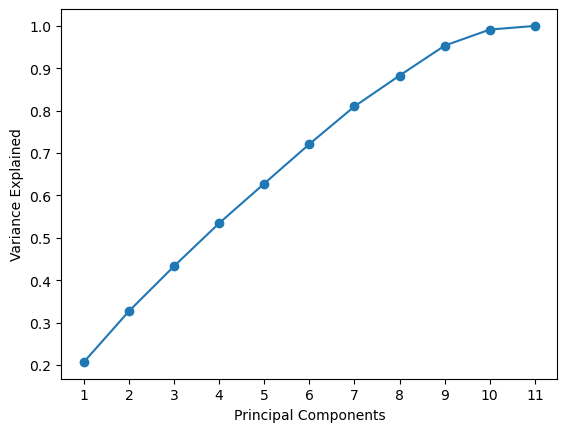

In [37]:
pca = PCA(n_components=None)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o')
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

### Deploying the Models

The dataset in numeric. So, planned to implement regressors

- Linear Regression
- Ridge Regression
- Decision Tree
- Random Forest
- XGBRegressor 
- GradientBoostingRegressor 

### Linear Regression

In [38]:
model = LinearRegression() 
r2_train, rmse_train = model_L(X_train = X_train_pca, X_test = X_test, y_train = y_train, y_test = y_test, model = model, valid = None, X_val = X_val, y_val = y_val, nam="Linear_Regression")

Test Data Set R^2 0.30462049110770484
Test Data Set RMSE 0.8263105677852912
#########################################################
Validation Data Set R^2 0.3427807846172036
Validation Data Set RMSE 0.7857723883402503
#########################################################


In [39]:
model = LinearRegression() 
r2_train, rmse_train = model_L(X_train = X_train_pca, X_test = X_test_pca, y_train = y_train, y_test = y_test, model = model, valid = None, X_val = X_val_pca, y_val = y_val, nam="Linear_Regression_PCA")

Test Data Set R^2 0.4943199108249563
Test Data Set RMSE 0.7046448619095296
#########################################################
Validation Data Set R^2 0.522265587429495
Validation Data Set RMSE 0.6699384444108494
#########################################################


So, From the above results states that the validation with PCA scaling has more accuracy. So, from now all the below model will be trained with PCA scaled data points.

### Ridge Regression

In [40]:
model = Ridge(alpha=1.0) 
r2_train, rmse_train = model_L(X_train = X_train_pca, X_test = X_test_pca, y_train = y_train, y_test = y_test, model = model, valid = None, X_val = X_val_pca, y_val = y_val, nam="Ridge_Regression")

Test Data Set R^2 0.4943259277898182
Test Data Set RMSE 0.7046406696978158
#########################################################
Validation Data Set R^2 0.5222733468771946
Validation Data Set RMSE 0.6699330037587915
#########################################################


#### RIDGE WITH HYPERR PARAMETERS

In [41]:
grid_search_param = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
best_model, best_score, best_param, y_pred_valt, score_val, grid_search = grid(model, grid_search_param, X_train_pca, y_train, X_val = X_val_pca, y_val = y_val, score= True)
r2_train, rmse_train = model_L(X_train = X_train_pca, X_test = X_test_pca, y_train = y_train, y_test = y_test, model = best_model, valid = None, X_val = X_val_pca, y_val = y_val, nam="Ridge_Regression_Hyper")

Test Data Set R^2 0.4943772199600248
Test Data Set RMSE 0.7046049317910182
#########################################################
Validation Data Set R^2 0.522340107117838
Validation Data Set RMSE 0.6698861919984571
#########################################################


In [42]:
rdm_bst_mdl = best_model
save_model(rdm_bst_mdl)

### Decision Tree Regressor

In [43]:
model = DecisionTreeRegressor(random_state=0)
r2_train, rmse_train = model_L(X_train = X_train_pca, X_test = X_test_pca, y_train = y_train, y_test = y_test, model = model, valid = None, X_val = X_val_pca, y_val = y_val, nam="Decision_Tree")

Test Data Set R^2 0.17056772565966505
Test Data Set RMSE 0.9024493318442088
#########################################################
Validation Data Set R^2 0.15987087786254506
Validation Data Set RMSE 0.8884124933356525
#########################################################


#### Decision Tree with Hyper Parameters

In [44]:
# grid_search_param = {
#     'criterion': ['squared_error', 'friedman_mse', 'poisson', 'absolute_error'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 10, 20],
#     'min_samples_leaf': [1, 5, 10],
#     'max_features': ['auto', 'sqrt', 'log2', None]
# }

grid_search_param = {'criterion': ['squared_error'], 'max_depth': [10], 'max_features': [None], 'min_samples_leaf': [10], 'min_samples_split': [2]}

best_model, best_score, best_param, y_pred_valt, score_val, grid_search = grid(model, grid_search_param, X_train_pca, y_train, X_val = X_val_pca, y_val = y_val, score= True)
r2_train, rmse_train = model_L(X_train = X_train_pca, X_test = X_test_pca, y_train = y_train, y_test = y_test, model = best_model, valid = None, X_val = X_val_pca, y_val = y_val, nam="Decision_Tree_Hyper")

Test Data Set R^2 0.5276786461542058
Test Data Set RMSE 0.6810063365202629
#########################################################
Validation Data Set R^2 0.49572039957319647
Validation Data Set RMSE 0.6882993153665471
#########################################################


In [45]:
rdm_bst_mdl = best_model
save_model(rdm_bst_mdl)

#### Random Forest

In [46]:
model = RandomForestRegressor(max_depth=2, random_state=0)
r2_train, rmse_train = model_L(X_train = X_train_pca, X_test = X_test_pca, y_train = y_train, y_test = y_test, model = model, valid = None, X_val = X_val_pca, y_val = y_val, nam="Random_Forest")

Test Data Set R^2 0.3004720605555
Test Data Set RMSE 0.828771666152652
#########################################################
Validation Data Set R^2 0.33236916474031675
Validation Data Set RMSE 0.7919720063759195
#########################################################


#### Random Forest with Hyper Parameters

In [47]:
# grid_search_param =  {'bootstrap': [True, False],
#  'max_depth': [10, 20, 40, 50, 60, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 800, 1000, 1400, 1600, 2000]}

grid_search_param = {'bootstrap':[True], 'max_depth': [10], 'max_features': ['sqrt'], 'min_samples_leaf': [1], 'min_samples_split': [2], 'n_estimators':[800]}
#n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101 
best_model, best_score, best_param, y_pred_valt, score_val, grid_search = grid(model, grid_search_param, X_train_pca, y_train, X_val = X_val_pca, y_val = y_val, score= True)
r2_train, rmse_train = model_L(X_train = X_train_pca, X_test = X_test_pca, y_train = y_train, y_test = y_test, model = best_model, valid = None, X_val = X_val_pca, y_val = y_val, nam="Random_Forest_Hyper")

Test Data Set R^2 0.5809405017697498
Test Data Set RMSE 0.6414609260160159
#########################################################
Validation Data Set R^2 0.586218311161951
Validation Data Set RMSE 0.6234868116547211
#########################################################


In [48]:
rdm_bst_mdl = best_model
save_model(rdm_bst_mdl)

In [49]:
print(best_param)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}


#### XGB Boost Regressor

In [50]:
model = xgb.XGBRegressor()
r2_train, rmse_train = model_L(X_train = X_train_pca, X_test = X_test_pca, y_train = y_train, y_test = y_test, model = model, valid = None, X_val = X_val_pca, y_val = y_val, nam="XGBoost")

Test Data Set R^2 0.4959105234806622
Test Data Set RMSE 0.7035357616816331
#########################################################
Validation Data Set R^2 0.5046095418600653
Validation Data Set RMSE 0.6822058766470985
#########################################################


#### XGBoost Hyper Parameter

In [51]:
# grid_search_param = {'learning_rate' : [0.05, 0.10, 0.20],  
#           'min_child_weight': [1, 5, 10],  
#           'gamma': [0.5, 1, 5],  
#           'subsample': [0.6, 0.8, 1.0],  
#           'colsample_bytree': [0.6, 0.8, 1.0],  
#            'max_depth': [3, 4, 5]  
#          } 


grid_search_param = {'colsample_bytree': [0.8], 'gamma': [1], 'learning_rate': [0.05], 'max_depth': [5], 'min_child_weight': [5], 'subsample': [0.8]}
best_model, best_score, best_param, y_pred_valt, score_val, grid_search = grid(model, grid_search_param, X_train_pca, y_train, X_val = X_val_pca, y_val = y_val, score= True)
r2_train, rmse_train = model_L(X_train = X_train_pca, X_test = X_test_pca, y_train = y_train, y_test = y_test, model = best_model, valid = None, X_val = X_val_pca, y_val = y_val, nam="XGBoost_Hyper")

Test Data Set R^2 0.5818975729967162
Test Data Set RMSE 0.6407280053600883
#########################################################
Validation Data Set R^2 0.5842403542862409
Validation Data Set RMSE 0.6249752290997523
#########################################################


In [52]:
rdm_bst_mdl = best_model
save_model(rdm_bst_mdl)

#### Gradient Boost Regressor

In [53]:
model = GradientBoostingRegressor()
r2_train, rmse_train = model_L(X_train = X_train_pca, X_test = X_test_pca, y_train = y_train, y_test = y_test, model = model, valid = None, X_val = X_val_pca, y_val = y_val, nam="GBRegressor")

Test Data Set R^2 0.5748789920659978
Test Data Set RMSE 0.6460834940190109
#########################################################
Validation Data Set R^2 0.5720582428655648
Validation Data Set RMSE 0.6340652763383213
#########################################################


#### Gradient Boost Regressor Hypertuning

In [54]:
# grid_search_param = {
#     'n_estimators': [100, 300, 500],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 8],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2, 4],
#     'subsample': [0.8, 0.9, 1.0],
#     'max_features': ['sqrt', None]
# }
grid_search_param = {
    'n_estimators': [300],
    'learning_rate': [ 0.2],
    'max_depth': [ 8],
    'min_samples_split': [ 5],
    'min_samples_leaf': [4],
    'subsample': [1.0],
    'max_features': ['sqrt']
}
best_model, best_score, best_param, y_pred_valt, score_val, grid_search = grid(model, grid_search_param, X_train_pca, y_train, X_val = X_val_pca, y_val = y_val, score= True)
r2_train, rmse_train = model_L(X_train = X_train_pca, X_test = X_test_pca, y_train = y_train, y_test = y_test, model = best_model, valid = None, X_val = X_val_pca, y_val = y_val, nam="GradientBoost_Hyper")

Test Data Set R^2 0.49165651452064885
Test Data Set RMSE 0.7064980926954341
#########################################################
Validation Data Set R^2 0.506150917429244
Validation Data Set RMSE 0.6811437299349911
#########################################################


#### Tabulation

In [55]:
tab = tabulate(Table_All, headers=["Model", "Score","2d","gr"], tablefmt='fancy_grid')
df_tab_ = pd.DataFrame(Table_All, columns =["Model", "Score","2d","gr"])
df_tab = df_tab_ 

In [56]:
#df_tab = df_tab.drop(["2d","gr"], axis=1)
sort = df_tab_.sort_values("Score", ascending=False)
display(sort.iloc[:8]) 

,Model,Score,2d,gr
15,Random_Forest_HyperVALIDATION_Data_Set,0.586218,0.623487,"(DecisionTreeRegressor(max_depth=10, max_featu..."
19,XGBoost_HyperVALIDATION_Data_Set,0.584240,0.624975,"XGBRegressor(base_score=None, booster=None, ca..."
18,XGBoost_Hyper_Test_Data_Set,0.581898,0.640728,"XGBRegressor(base_score=None, booster=None, ca..."
14,Random_Forest_Hyper_Test_Data_Set,0.580941,0.641461,"(DecisionTreeRegressor(max_depth=10, max_featu..."
20,GBRegressor_Test_Data_Set,0.574879,0.646083,([DecisionTreeRegressor(criterion='friedman_ms...
21,GBRegressorVALIDATION_Data_Set,0.572058,0.634065,([DecisionTreeRegressor(criterion='friedman_ms...
10,Decision_Tree_Hyper_Test_Data_Set,0.527679,0.681006,"DecisionTreeRegressor(max_depth=10, min_sample..."
7,Ridge_Regression_HyperVALIDATION_Data_Set,0.522340,0.669886,Ridge(alpha=10)


## Update - 3, Work

- Ensemble Model Implementation
- Pruning
- Feature Selection
- AWS implementation

### Ensemble Model Implementation

In [57]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [58]:
X = df_.drop('Item_Outlet_Sales',axis=1)
y = df_['Item_Outlet_Sales'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

In [59]:
# Base regressors
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=1)
svm_reg = SVR()

In [60]:
model = VotingRegressor(estimators=[
    ('lr', lin_reg), ('dt', tree_reg), ('svr', svm_reg)
]) 

In [61]:
model = VotingRegressor(estimators=[
    ('lr', lin_reg), ('dt', tree_reg), ('svr', svm_reg)
])
r2_train, rmse_train = model_L(X_train = X_train_pca, X_test = X_test_pca, y_train = y_train, y_test = y_test, model = model, valid = None, X_val = X_val_pca, y_val = y_val, nam="ensemble method")

Test Data Set R^2 0.5393894649248641
Test Data Set RMSE 0.6725108508765443
#########################################################
Validation Data Set R^2 0.5533029063942139
Validation Data Set RMSE 0.6478108251386955
#########################################################


In [62]:
sort = df_tab_.sort_values("Score", ascending=False)
display(sort.iloc[:8]) 

,Model,Score,2d,gr
15,Random_Forest_HyperVALIDATION_Data_Set,0.586218,0.623487,"(DecisionTreeRegressor(max_depth=10, max_featu..."
19,XGBoost_HyperVALIDATION_Data_Set,0.584240,0.624975,"XGBRegressor(base_score=None, booster=None, ca..."
18,XGBoost_Hyper_Test_Data_Set,0.581898,0.640728,"XGBRegressor(base_score=None, booster=None, ca..."
14,Random_Forest_Hyper_Test_Data_Set,0.580941,0.641461,"(DecisionTreeRegressor(max_depth=10, max_featu..."
20,GBRegressor_Test_Data_Set,0.574879,0.646083,([DecisionTreeRegressor(criterion='friedman_ms...
21,GBRegressorVALIDATION_Data_Set,0.572058,0.634065,([DecisionTreeRegressor(criterion='friedman_ms...
10,Decision_Tree_Hyper_Test_Data_Set,0.527679,0.681006,"DecisionTreeRegressor(max_depth=10, min_sample..."
7,Ridge_Regression_HyperVALIDATION_Data_Set,0.522340,0.669886,Ridge(alpha=10)


### Artificial Neural Network

In [63]:
#n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101 

model = RandomForestRegressor(max_depth=2, random_state=0)

grid_search_param = {'bootstrap':[True], 'max_depth': [5], 'max_features': ['sqrt'], 'min_samples_leaf': [100], 'min_samples_split': [2], 'n_estimators':[200], 'n_jobs': [4]}

best_model, best_score, best_param, y_pred_valt, score_val, grid_search = grid(model, grid_search_param, X_train_pca, y_train, X_val = X_val_pca, y_val = y_val, score= True)
r2_train, rmse_train = model_L(X_train = X_train_pca, X_test = X_test_pca, y_train = y_train, y_test = y_test, model = best_model, valid = None, X_val = X_val_pca, y_val = y_val, nam="Random_Forest_Hyper") 

Test Data Set R^2 0.4766672057260116
Test Data Set RMSE 0.7168385253188185
#########################################################
Validation Data Set R^2 0.4987150299616818
Validation Data Set RMSE 0.6862525626904086
#########################################################


In [64]:
df_tab #R2 has to be high and RMSE has to be low. 

,Model,Score,2d,gr
0,Linear_Regression_Test_Data_Set,0.304620,0.826311,LinearRegression()
1,Linear_RegressionVALIDATION_Data_Set,0.342781,0.785772,LinearRegression()
2,Linear_Regression_PCA_Test_Data_Set,0.494320,0.704645,LinearRegression()
3,Linear_Regression_PCAVALIDATION_Data_Set,0.522266,0.669938,LinearRegression()
4,Ridge_Regression_Test_Data_Set,0.494326,0.704641,Ridge()
5,Ridge_RegressionVALIDATION_Data_Set,0.522273,0.669933,Ridge()
6,Ridge_Regression_Hyper_Test_Data_Set,0.494377,0.704605,Ridge(alpha=10)
7,Ridge_Regression_HyperVALIDATION_Data_Set,0.522340,0.669886,Ridge(alpha=10)
8,Decision_Tree_Test_Data_Set,0.170568,0.902449,DecisionTreeRegressor(random_state=0)
9,Decision_TreeVALIDATION_Data_Set,0.159871,0.888412,DecisionTreeRegressor(random_state=0)


In [65]:
print(tabulate(Table_All, headers=["Model","Score", "Param"]) )  

                                              Model     Score  Param
-----------------------------------------  --------  --------  ------------------------------------------------------------------------------
Linear_Regression_Test_Data_Set            0.30462   0.826311  LinearRegression()
Linear_RegressionVALIDATION_Data_Set       0.342781  0.785772  LinearRegression()
Linear_Regression_PCA_Test_Data_Set        0.49432   0.704645  LinearRegression()
Linear_Regression_PCAVALIDATION_Data_Set   0.522266  0.669938  LinearRegression()
Ridge_Regression_Test_Data_Set             0.494326  0.704641  Ridge()
Ridge_RegressionVALIDATION_Data_Set        0.522273  0.669933  Ridge()
Ridge_Regression_Hyper_Test_Data_Set       0.494377  0.704605  Ridge(alpha=10)
Ridge_Regression_HyperVALIDATION_Data_Set  0.52234   0.669886  Ridge(alpha=10)
Decision_Tree_Test_Data_Set                0.170568  0.902449  DecisionTreeRegressor(random_state=0)
Decision_TreeVALIDATION_Data_Set           0.159871  0.88841

In [66]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np

########## Level 0 models ##########
#grid_search_param = {'bootstrap':[True], 'max_depth': [10], 'max_features': ['sqrt'], 'min_samples_leaf': [1], 'min_samples_split': [2], 'n_estimators':[800]}

xgb = RandomForestRegressor(bootstrap = True, max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators = 800)
gbr = XGBRegressor(colsample_bytree= 0.8, gamma= 1, learning_rate= 0.05, max_depth= 5, min_child_weight= 5, subsample= 0.8)

xgb.fit(X_train, y_train)
gbr.fit(X_train, y_train)

xgb_train_preds = xgb.predict(X_train)
gbr_train_preds = gbr.predict(X_train)

X_stack_train = np.column_stack((xgb_train_preds, gbr_train_preds))

########## Fit level 1 model on stacked train features ##########
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_stack_train, y_train)

xgb_test_preds = xgb.predict(X_test)
gbr_test_preds = gbr.predict(X_test)

X_stack_test = np.column_stack((xgb_test_preds, gbr_test_preds))
y_pred = rf.predict(X_stack_test)
r2_train, rmse_train = test_(y_pred, model, X_train, X_val, y_train = X_val, y_test = y_val, val = True)

Validation Data Set R^2 -0.8428477157092229
Validation Data Set RMSE 1.3157893347825873
#########################################################


In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess your data
# Assuming X_train, X_test, y_train, y_test are your train and test data

# Define hyperparameters
num_features = X_train.shape[1]
num_classes = len(set(y_train))
dropout_rate = 0.3
l2_reg = 0.001
batch_size = 64
epochs = 200
learning_rate = 0.001

# Define the model architecture
model = Sequential()
model.add(Dense(128, input_dim=num_features, kernel_regularizer=l2(l2_reg)))
model.add(Dropout(dropout_rate))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(l2_reg)))
model.add(Dropout(dropout_rate))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(l2_reg)))
model.add(Dropout(dropout_rate))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

Epoch 1/200
80/80 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/200
80/80 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/200
80/80 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/200
80/80 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/200
80/80 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/200
80/80 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/200
80/80 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00

In [68]:
df 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-1.388514,-0.841872,-0.738147,-0.970732,-0.766479,1.747454,1.507813,0.139541,-0.664080,-1.369334,-0.252658,0.910601
1,-1.717991,-1.641706,1.354743,-0.908111,1.608963,-1.489023,-0.607071,1.334103,-0.664080,1.091569,1.002972,-1.018440
2,-0.262057,1.098554,-0.738147,-0.956917,0.658786,0.010040,1.507813,0.139541,-0.664080,-1.369334,-0.252658,-0.049238
3,0.759769,1.500838,1.354743,-1.281758,-0.291391,0.660050,-1.664513,0.020085,0.799954,1.091569,-1.508289,-0.849103
4,1.151580,-0.929428,-0.738147,-1.281758,0.421242,-1.399220,-1.312032,-1.293934,-2.128115,1.091569,-0.252658,-0.695373
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-0.912107,-1.418084,-0.738147,-0.181193,1.371418,1.180783,-1.312032,-1.293934,-2.128115,1.091569,-0.252658,0.349915
8519,0.261100,-1.059578,1.354743,-0.371154,-1.716656,-0.527301,0.802852,0.497909,0.799954,-0.138882,-0.252658,-0.956402
8520,1.285152,-0.534243,-0.738147,-0.599784,0.183698,-0.897208,0.450371,0.736822,0.799954,-0.138882,-0.252658,-0.579100
8521,-0.219759,-1.336444,1.354743,1.532880,1.371418,-0.607977,-0.607071,1.334103,-0.664080,1.091569,1.002972,-0.196725
